#  SUPERVISED LEARNING

### Importing the required libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

###  Importing dataset 

In [3]:
## Importing dataset named 'diamond' from seaborn

diamonds=sns.load_dataset('diamonds')

In [4]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [6]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [7]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

From above information we can understand that x,y,z as whole can act as volume but still doesnt affect our model if we drop those columns ass the carat and depth fullfill its function.

Thus,creating Dataframe without x,y,z columns.

In [9]:
d=pd.DataFrame({"carat":diamonds["carat"],"color":diamonds["color"],"clarity":diamonds["clarity"],"depth":diamonds["depth"],"price":diamonds["price"]})

In [10]:
d

,carat,color,clarity,depth,price
0,0.23,E,SI2,61.5,326
1,0.21,E,SI1,59.8,326
2,0.23,E,VS1,56.9,327
3,0.29,I,VS2,62.4,334
4,0.31,J,SI2,63.3,335
...,...,...,...,...,...
53935,0.72,D,SI1,60.8,2757
53936,0.72,D,SI1,63.1,2757
53937,0.70,D,SI1,62.8,2757
53938,0.86,H,SI2,61.0,2757


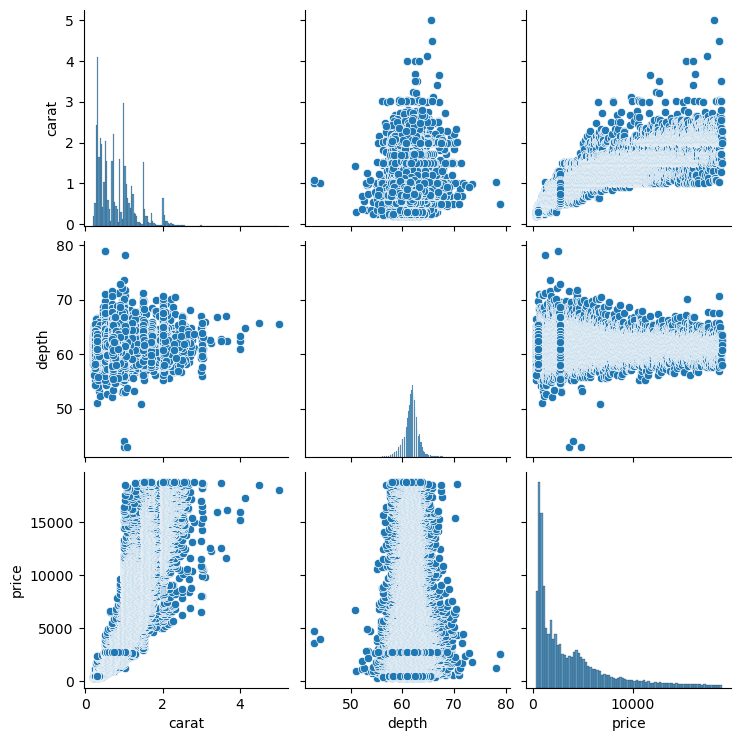

In [11]:
g = sns.pairplot(d)
plt.show()

Result: As the carat increases the price also increases (Directly propotional)

Expanded view of carat against price plot 

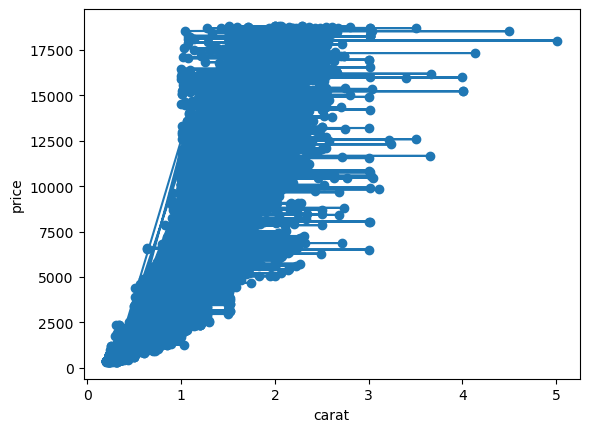

In [12]:
plt.scatter(d['carat'],d['price'])
plt.plot(d['carat'],d['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

In [13]:
d["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [14]:
d["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

Result : As color and clarity are categorical with minimum no. of classes, we can proceed with label encoding 

### Label Encoding
Converting the categorical dt into int by labeling each class with one number.

In [15]:
d['clarity'] = pd.Categorical(d['clarity']).codes
d['color'] = pd.Categorical(d['color']).codes
d

,carat,color,clarity,depth,price
0,0.23,1,6,61.5,326
1,0.21,1,5,59.8,326
2,0.23,1,3,56.9,327
3,0.29,5,4,62.4,334
4,0.31,6,6,63.3,335
...,...,...,...,...,...
53935,0.72,0,5,60.8,2757
53936,0.72,0,5,63.1,2757
53937,0.70,0,5,62.8,2757
53938,0.86,4,6,61.0,2757


In [16]:
d.dtypes

carat      float64
color         int8
clarity       int8
depth      float64
price        int64
dtype: object

Result : Categorical dt is successfully converted into int  

### Splitting the Numerical and categorical parameters

In [17]:
num_data = d.select_dtypes(include = np.number)  
cat_data = d.select_dtypes(include = "category")

In [18]:
num_data.head()

,carat,color,clarity,depth,price
0,0.23,1,6,61.5,326
1,0.21,1,5,59.8,326
2,0.23,1,3,56.9,327
3,0.29,5,4,62.4,334
4,0.31,6,6,63.3,335


In [19]:
num_data.describe()

,carat,color,clarity,depth,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.594197,3.948980,61.749405,3932.799722
std,0.474011,1.701105,1.647136,1.432621,3989.439738
min,0.200000,0.000000,0.000000,43.000000,326.000000
25%,0.400000,1.000000,3.000000,61.000000,950.000000
50%,0.700000,3.000000,4.000000,61.800000,2401.000000
75%,1.040000,4.000000,5.000000,62.500000,5324.250000
max,5.010000,6.000000,7.000000,79.000000,18823.000000


### Scaling the Numerical variables 

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()

In [22]:
num_data_sc = sc.fit_transform(num_data)

In [23]:
num_data_sc = pd.DataFrame(num_data_sc, columns=num_data.columns)

In [24]:
num_data_sc.head()

,carat,color,clarity,depth,price
0,-1.198168,-0.937163,1.245215,-0.174092,-0.904095
1,-1.240361,-0.937163,0.638095,-1.360738,-0.904095
2,-1.198168,-0.937163,-0.576145,-3.385019,-0.903844
3,-1.071587,1.414272,0.030975,0.454133,-0.902090
4,-1.029394,2.002131,1.245215,1.082358,-0.901839


In [25]:
num_data_sc.describe()

,carat,color,clarity,depth,price
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,2.444878e-16,-1.338360e-16,8.114467e-17,-3.996902e-15,-9.273676e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.261458e+00,-1.525021e+00,-2.397505e+00,-1.308760e+01,-9.040952e-01
25%,-8.395232e-01,-9.371628e-01,-5.761450e-01,-5.231053e-01,-7.476808e-01
50%,-2.066210e-01,2.385547e-01,3.097505e-02,3.531678e-02,-3.839672e-01
75%,5.106683e-01,8.264134e-01,6.380951e-01,5.239361e-01,3.487866e-01
max,8.886075e+00,2.002131e+00,1.852335e+00,1.204139e+01,3.732438e+00


### Concatenating both Numeric and categoric tables together 

In [26]:
data = pd.concat([num_data_sc, cat_data], axis = 1)

In [27]:
data.head()

,carat,color,clarity,depth,price
0,-1.198168,-0.937163,1.245215,-0.174092,-0.904095
1,-1.240361,-0.937163,0.638095,-1.360738,-0.904095
2,-1.198168,-0.937163,-0.576145,-3.385019,-0.903844
3,-1.071587,1.414272,0.030975,0.454133,-0.902090
4,-1.029394,2.002131,1.245215,1.082358,-0.901839


### Splitting the independent and dependent variablese

In [28]:
x = data.drop('price',axis=1) # Independent Variables
x.head()   

,carat,color,clarity,depth
0,-1.198168,-0.937163,1.245215,-0.174092
1,-1.240361,-0.937163,0.638095,-1.360738
2,-1.198168,-0.937163,-0.576145,-3.385019
3,-1.071587,1.414272,0.030975,0.454133
4,-1.029394,2.002131,1.245215,1.082358


In [29]:
y = data[["price"]] # Dependent varibale
y.head()

,price
0,-0.904095
1,-0.904095
2,-0.903844
3,-0.902090
4,-0.901839


### Splitting the training and testing data 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [32]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((43152, 4), (10788, 4), (43152, 1), (10788, 1))

#### ___________________
# 1 REGRESSION ALGORITHM
#### ___________________

# 1.1 LINEAR REGRESSION
     Building Linear regression model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr_mod = lr.fit(xtrain, ytrain) 

NOTE : Model fitting (i.e fit()) is a measure of how well a machine learning model generalizes to similar data to that on which it was trained. A model that is well-fitted produces more accurate outcomes

In [36]:
lr_train_ypred = lr_mod.predict(xtrain)
lr_train_ypred

array([[ 1.57509528],
       [-0.9049219 ],
       [ 0.43680386],
       ...,
       [ 0.57972414],
       [ 1.85169104],
       [-0.81349154]])

In [37]:
lr_test_ypred = lr_mod.predict(xtest)
lr_test_ypred

array([[-0.35955825],
       [ 0.29844777],
       [-1.27512635],
       ...,
       [-0.69984205],
       [ 2.32807625],
       [ 0.14935444]])

## Coefficients and intercepts 

In [38]:
print("Linear Regression Coeffecients: \n {}".format(lr_mod.coef_))

Linear Regression Coeffecients: 
 [[ 1.03900159 -0.13549166 -0.22149239 -0.01800603]]


In [39]:
print("y-intercept: {}".format(lr_mod.intercept_))

y-intercept: [-6.83881871e-05]


## Evaluation Metrics

In [40]:
from sklearn.metrics import mean_squared_error , mean_absolute_error,mean_absolute_percentage_error

In [41]:
print("           Training              Testing")

## Mean Squared Error

print("MSE  : {}".format(mean_squared_error((ytrain),(lr_train_ypred))),end=" ")
print("   {}".format(mean_squared_error((ytest),(lr_test_ypred))))


## Root Mean Squared Error

print("RMSE : {}".format(np.sqrt(mean_squared_error((ytrain),(lr_train_ypred)))),end=" ")
print("    {}".format(np.sqrt(mean_squared_error((ytest),(lr_test_ypred)))))


## Mean Absolute Error

print("MAE  : {}".format(mean_absolute_error((ytrain),(lr_train_ypred))),end=" ")
print("   {}".format(mean_absolute_error((ytest),(lr_test_ypred))))


## Mean Absolute Percentage Error

print("MAPE : {}".format(mean_absolute_percentage_error((ytrain),(lr_train_ypred))),end=" ")
print("    {}".format(mean_absolute_percentage_error((ytest),(lr_test_ypred))))

           Training              Testing
MSE  : 0.09739315319410687    0.09697788173863187
RMSE : 0.3120787612031727     0.31141271929488024
MAE  : 0.21594084228647079    0.2163536837540691
MAPE : 1.4037362745387694     1.3695391843061966


# 1.2 Decision Tree Regressor 

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
dt = DecisionTreeRegressor()

In [44]:
dt_mod = dt.fit(xtrain, ytrain)

In [45]:
dt_train_pred = dt_mod.predict(xtrain)
dt_train_pred

array([ 2.55657323, -0.78916568,  0.53697268, ...,  0.44773626,
        3.20115593, -0.77776046])

In [46]:
dt_test_pred = dt_mod.predict(xtest)
dt_test_pred

array([-0.53070594, -0.04707465, -0.83466121, ..., -0.64992178,
        1.78177053, -0.19546779])

## 1.2.1 Evaluation Metrics

In [47]:
print("           Training              Testing")

## Mean Squared Error

print("MSE  : {}".format(mean_squared_error((ytrain),(dt_train_pred))),end=" ")
print("   {}".format(mean_squared_error((ytest),(dt_test_pred))))


## Root Mean Squared Error

print("RMSE : {}".format(np.sqrt(mean_squared_error((ytrain),(dt_train_pred)))),end=" ")
print("    {}".format(np.sqrt(mean_squared_error((ytest),(dt_test_pred)))))


## Mean Absolute Error

print("MAE  : {}".format(mean_absolute_error((ytrain),(dt_train_pred))),end=" ")
print("   {}".format(mean_absolute_error((ytest),(dt_test_pred))))


## Mean Absolute Percentage Error

print("MAPE : {}".format(mean_absolute_percentage_error((ytrain),(dt_train_pred))),end=" ")
print("    {}".format(mean_absolute_percentage_error((ytest),(dt_test_pred))))

           Training              Testing
MSE  : 0.0017496757643152027    0.032358283598644656
RMSE : 0.0418291257895166     0.17988408378354284
MAE  : 0.01603201196022079    0.09037397869062268
MAPE : 0.130309642460942     0.8270429387162357


# 1.3 Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf = RandomForestRegressor()

In [50]:
rf_mod = rf.fit(xtrain, ytrain)

In [51]:
rf_train_pred = rf_mod.predict(xtrain)
rf_train_pred

array([ 2.58939184, -0.78911668,  0.53879651, ...,  0.40466967,
        3.18528814, -0.76603911])

In [52]:
rf_test_pred = rf_mod.predict(xtest)
rf_test_pred

array([-0.52992641, -0.05571253, -0.83647602, ..., -0.66191104,
        2.22080354, -0.10631459])

## 1.3.1 Evaluation Metrics

In [53]:
print("           Training              Testing")

## Mean Squared Error

print("MSE  : {}".format(mean_squared_error((ytrain),(rf_train_pred))),end=" ")
print("   {}".format(mean_squared_error((ytest),(rf_test_pred))))


## Root Mean Squared Error

print("RMSE : {}".format(np.sqrt(mean_squared_error((ytrain),(rf_train_pred)))),end=" ")
print("    {}".format(np.sqrt(mean_squared_error((ytest),(rf_test_pred)))))


## Mean Absolute Error

print("MAE  : {}".format(mean_absolute_error((ytrain),(rf_train_pred))),end=" ")
print("   {}".format(mean_absolute_error((ytest),(rf_test_pred))))


## Mean Absolute Percentage Error

print("MAPE : {}".format(mean_absolute_percentage_error((ytrain),(rf_train_pred))),end=" ")
print("    {}".format(mean_absolute_percentage_error((ytest),(rf_test_pred))))

           Training              Testing
MSE  : 0.004168117867149041    0.021408179290490718
RMSE : 0.06456096240878881     0.1463153419518634
MAE  : 0.03544825473565048    0.07688966224342049
MAPE : 0.29244109017695835     0.6992993772927678


# Selecting New Dataset For classification

In [54]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### Importing planet dataset

In [55]:
planet=sns.load_dataset('planets')
planet

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [56]:
planet.shape

(1035, 6)

In [57]:
planet['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

## Label Encoding 

In [58]:
planet['method'] = pd.Categorical(planet['method']).codes
planet   

,method,number,orbital_period,mass,distance,year
0,7,1,269.300000,7.10,77.40,2006
1,7,1,874.774000,2.21,56.95,2008
2,7,1,763.000000,2.60,19.84,2011
3,7,1,326.030000,19.40,110.62,2007
4,7,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,8,1,3.941507,NaN,172.00,2006
1031,8,1,2.615864,NaN,148.00,2007
1032,8,1,3.191524,NaN,174.00,2007
1033,8,1,4.125083,NaN,293.00,2008


In [59]:
planet.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

Case1:
    can replace all three (orbital_period,mass,distance) null values with their mean values
    
Case2:
    can replace both (mass,distance) null values with mean values as orbital_period has only 24 null values, we can drop them.

In [60]:
### Since there are lot of null vaues in mass, we can replace those, as we cannot delete /drop that column.
## let us find the average of that column and replace the null value with avg value.

planet.describe()

,method,number,orbital_period,mass,distance,year
count,1035.000000,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,7.033816,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.458589,1.240976,26014.728304,3.818617,733.116493,3.972567
min,0.000000,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,7.000000,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,7.000000,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,8.000000,2.000000,526.005000,3.040000,178.500000,2012.000000
max,9.000000,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [61]:
## Going with case1

planet["orbital_period"].fillna(2002.917596, inplace = True)
planet["mass"].fillna(2.638161, inplace = True)
planet["distance"].fillna(264.069282, inplace = True)

In [62]:
planet['number'].value_counts()

1    595
2    259
3     88
4     32
5     30
6     24
7      7
Name: number, dtype: int64

In [63]:
planet.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

###### Cleared all null values.

## Outliers Treatment

<Axes: >

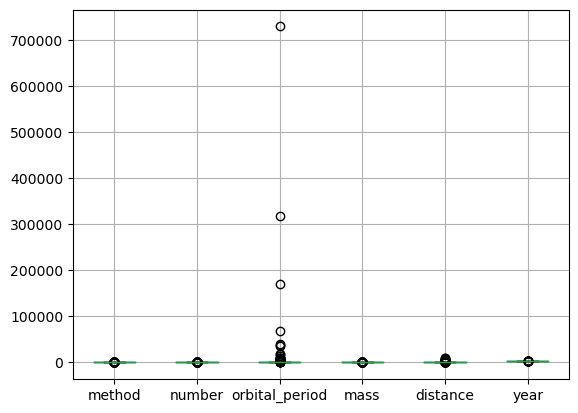

In [64]:
planet.boxplot()

### Finding the boundary values

In [65]:
print("Highest allowed",planet["orbital_period"].mean() + 3*planet["orbital_period"].std())
print("Lowest allowed",planet["orbital_period"].mean() - 3*planet["orbital_period"].std())

Highest allowed 78407.09549119131
Lowest allowed -74401.26029900968


###  Finding the outliers

In [66]:
planet[(planet["orbital_period"] > 78407.09) | (planet["orbital_period"] < -74401.26)]

,method,number,orbital_period,mass,distance,year
68,2,1,318280.0,2.638161,7.690000,2008
643,2,4,170000.0,2.638161,39.940000,2008
937,2,1,730000.0,2.638161,264.069282,2006


### Trimming of outliers

In [67]:
pl = planet[(planet["orbital_period"] < 78407.09) & (planet["orbital_period"] > -74401.26)]
pl

,method,number,orbital_period,mass,distance,year
0,7,1,269.300000,7.100000,77.40,2006
1,7,1,874.774000,2.210000,56.95,2008
2,7,1,763.000000,2.600000,19.84,2011
3,7,1,326.030000,19.400000,110.62,2007
4,7,1,516.220000,10.500000,119.47,2009
...,...,...,...,...,...,...
1030,8,1,3.941507,2.638161,172.00,2006
1031,8,1,2.615864,2.638161,148.00,2007
1032,8,1,3.191524,2.638161,174.00,2007
1033,8,1,4.125083,2.638161,293.00,2008


In [68]:
pl.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

<Axes: >

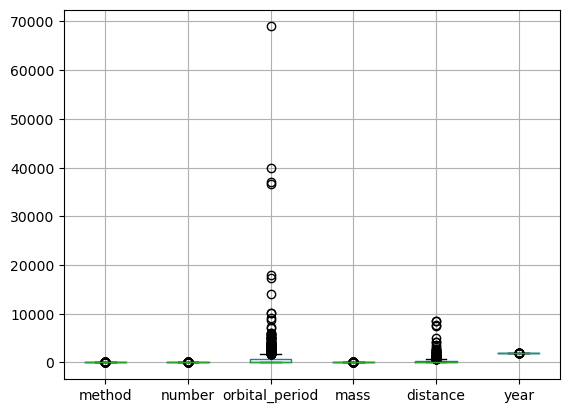

In [69]:
pl.boxplot()

<Axes: >

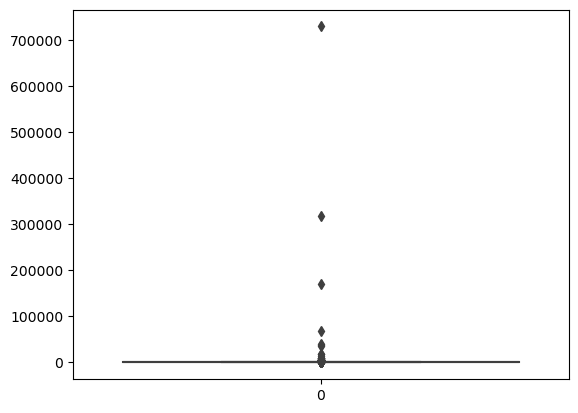

In [70]:
sns.boxplot(planet['orbital_period'])

In [71]:
upper_limit = planet['orbital_period'].quantile(0.99)
lower_limit = planet['orbital_period'].quantile(0.01)
print(upper_limit)
print(lower_limit)

10157.949999999993
0.8429656


In [72]:
new_df = planet[(planet['orbital_period'] <= 10157.94) & (planet['orbital_period'] >= 0.84)]
new_df

,method,number,orbital_period,mass,distance,year
0,7,1,269.300000,7.100000,77.40,2006
1,7,1,874.774000,2.210000,56.95,2008
2,7,1,763.000000,2.600000,19.84,2011
3,7,1,326.030000,19.400000,110.62,2007
4,7,1,516.220000,10.500000,119.47,2009
...,...,...,...,...,...,...
1030,8,1,3.941507,2.638161,172.00,2006
1031,8,1,2.615864,2.638161,148.00,2007
1032,8,1,3.191524,2.638161,174.00,2007
1033,8,1,4.125083,2.638161,293.00,2008


<Axes: xlabel='orbital_period', ylabel='Density'>

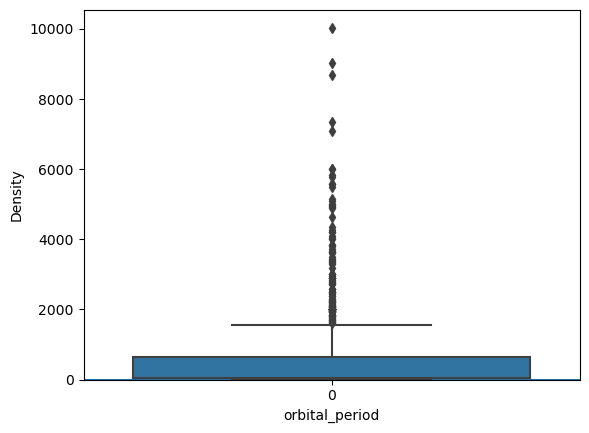

In [73]:
sns.distplot(new_df['orbital_period'])
sns.boxplot(new_df['orbital_period'])

In [74]:
planet['orbital_period'] = np.where(planet['orbital_period'] >= upper_limit,
        upper_limit,
        np.where(planet['orbital_period'] <= lower_limit,
        lower_limit,
        planet['orbital_period']))

<Axes: xlabel='orbital_period', ylabel='Density'>

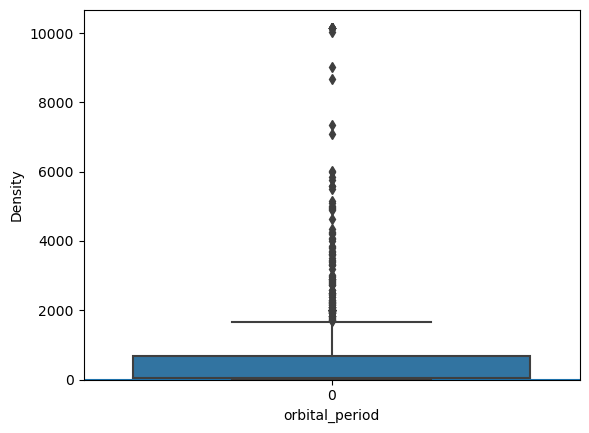

In [75]:
sns.distplot(planet['orbital_period'])
sns.boxplot(planet['orbital_period'])

##  Splitting the independent and dependent variablese

In [76]:
x = planet.drop('method', axis = 1) #Independent variables
x

,number,orbital_period,mass,distance,year
0,1,269.300000,7.100000,77.40,2006
1,1,874.774000,2.210000,56.95,2008
2,1,763.000000,2.600000,19.84,2011
3,1,326.030000,19.400000,110.62,2007
4,1,516.220000,10.500000,119.47,2009
...,...,...,...,...,...
1030,1,3.941507,2.638161,172.00,2006
1031,1,2.615864,2.638161,148.00,2007
1032,1,3.191524,2.638161,174.00,2007
1033,1,4.125083,2.638161,293.00,2008


In [77]:
y = planet['method'] #Dependent variable
y

0       7
1       7
2       7
3       7
4       7
       ..
1030    8
1031    8
1032    8
1033    8
1034    8
Name: method, Length: 1035, dtype: int8

##  Scaling the independent variables 

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
sc = StandardScaler()

In [80]:
x_sc = sc.fit_transform(x)

In [81]:
x_sc = pd.DataFrame(x_sc, columns=x.columns)

In [82]:
x_sc.head(5)

,number,orbital_period,mass,distance,year
0,-0.633281,-0.284920,1.661281,-0.288359,-0.773308
1,-0.633281,0.115711,-0.159418,-0.319949,-0.269611
2,-0.633281,0.041752,-0.014208,-0.377275,0.485933
3,-0.633281,-0.247382,6.240951,-0.237042,-0.521459
4,-0.633281,-0.121537,2.927206,-0.223371,-0.017763


In [83]:
x_sc.describe()

,number,orbital_period,mass,distance,year
count,1.035000e+03,1.035000e+03,1.035000e+03,1.035000e+03,1.035000e+03
mean,3.432574e-17,6.178632e-17,1.887915e-16,-2.746059e-17,-2.287467e-14
std,1.000483e+00,1.000483e+00,1.000483e+00,1.000483e+00,1.000483e+00
min,-6.332813e-01,-4.625526e-01,-9.809285e-01,-4.058377e-01,-5.054725e+00
25%,-6.332813e-01,-4.593071e-01,-5.038236e-01,-3.492069e-01,-5.214594e-01
50%,-6.332813e-01,-4.303360e-01,7.662463e-08,-2.449666e-01,2.340849e-01
75%,1.729255e-01,-1.743490e-02,7.662463e-08,-2.149229e-10,7.377811e-01
max,4.203960e+00,6.258215e+00,8.326005e+00,1.272252e+01,1.241477e+00


## Splitting the training and testing data 

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
xtrain, xtest, ytrain, ytest = train_test_split(x_sc, y, test_size=0.2)

In [86]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((828, 5), (207, 5), (828,), (207,))

# 1.2  Logical Regression as Classifier

### Logical Regression as Classifier

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
log = LogisticRegression()

In [89]:
model = log.fit(xtrain, ytrain)

In [90]:
log_train_pred = model.predict(xtrain)
log_train_pred

array([8, 7, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 8, 7, 7, 7, 7, 7,
       7, 7, 7, 8, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 8, 8, 7, 7, 7, 8, 7, 7,
       8, 8, 7, 8, 7, 8, 7, 8, 8, 8, 8, 8, 7, 8, 3, 7, 8, 7, 7, 8, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 2, 7, 7, 8, 8, 7, 8, 7, 7, 8, 7, 7, 7, 8, 8,
       7, 8, 7, 7, 8, 8, 7, 8, 8, 7, 8, 7, 7, 7, 7, 8, 7, 8, 2, 7, 3, 7,
       7, 8, 7, 7, 8, 8, 8, 8, 8, 7, 8, 7, 7, 8, 7, 7, 8, 8, 7, 7, 2, 8,
       8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 8, 7, 8, 7, 7, 8, 7, 7, 7, 7,
       8, 8, 7, 2, 8, 8, 8, 7, 8, 7, 7, 8, 8, 8, 7, 8, 7, 7, 7, 8, 8, 8,
       8, 7, 7, 7, 8, 8, 7, 8, 7, 7, 7, 8, 7, 8, 7, 7, 7, 7, 7, 5, 8, 8,
       7, 7, 8, 8, 8, 7, 3, 7, 7, 7, 7, 8, 7, 8, 7, 8, 7, 7, 7, 7, 7, 7,
       7, 8, 8, 7, 7, 8, 8, 7, 2, 2, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 7, 8, 7, 7, 5, 7, 7, 8,
       8, 7, 7, 7, 7, 8, 8, 7, 7, 7, 8, 8, 8, 8, 7, 7, 8, 8, 7, 8, 7, 2,
       8, 3, 7, 3, 7, 7, 7, 7, 2, 7, 8, 8, 7, 8, 7,

In [91]:
log_test_pred = model.predict(xtest)

In [92]:
log_test_pred

array([7, 8, 7, 7, 8, 7, 7, 8, 8, 7, 7, 8, 7, 7, 7, 7, 8, 7, 8, 7, 8, 8,
       7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 8, 7, 7, 7, 8, 7, 8,
       7, 7, 7, 8, 7, 8, 7, 7, 7, 8, 7, 8, 7, 8, 7, 8, 7, 7, 8, 7, 7, 8,
       7, 8, 7, 7, 8, 8, 7, 8, 7, 8, 8, 8, 7, 8, 8, 8, 7, 8, 7, 8, 7, 7,
       7, 8, 7, 8, 7, 8, 8, 7, 8, 8, 8, 7, 8, 7, 7, 7, 7, 7, 8, 7, 7, 8,
       7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 8, 8, 7, 7, 8, 7, 7, 7, 7, 2, 8,
       8, 8, 7, 7, 2, 8, 7, 8, 8, 2, 7, 8, 7, 8, 7, 8, 7, 7, 8, 8, 2, 8,
       7, 8, 7, 7, 7, 8, 7, 8, 7, 7, 7, 8, 8, 7, 8, 8, 8, 7, 7, 8, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 8, 8, 7, 7, 7, 7, 7, 8, 7, 8, 8, 8, 7, 8, 8,
       7, 7, 8, 7, 7, 7, 3, 7, 7], dtype=int8)

##  1.2.1 Performance Metrics

In [93]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### 1.2.1.1 Accuracy Score 

In [94]:
print("Logistic Regression Training - Accuracy Score: ",accuracy_score(ytrain, log_train_pred))

Logistic Regression Training - Accuracy Score:  0.8876811594202898


In [95]:
print("Logistic Regression Testing - Accuracy Score: ",accuracy_score(ytest, log_test_pred))

Logistic Regression Testing - Accuracy Score:  0.927536231884058


The model performed with a 89 % accuracy during the training phase. However, the accuracy has increased to 90% during the testing phase. This is a sign of underfitting. 

### 1.2.1.2 Classification Report

In [96]:
log_train_cr = classification_report(ytrain, log_train_pred)

In [97]:
print("Logistic Regression Training - Classification Report \n\n", log_train_cr)

Logistic Regression Training - Classification Report 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         7
           2       0.50      0.29      0.37        31
           3       0.86      0.55      0.67        22
           4       0.00      0.00      0.00         3
           5       1.00      0.60      0.75         5
           7       0.87      0.96      0.91       436
           8       0.93      0.92      0.93       318
           9       0.00      0.00      0.00         4

    accuracy                           0.89       828
   macro avg       0.46      0.37      0.40       828
weighted avg       0.87      0.89      0.87       828



In [98]:
log_test_cr = classification_report(ytest, log_test_pred)

In [99]:
print("Logistic Regression Testing - Classification Report \n\n", log_test_cr)

Logistic Regression Testing - Classification Report 

               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.40      0.29      0.33         7
           3       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.93      0.96      0.94       117
           8       0.96      0.97      0.97        79

    accuracy                           0.93       207
   macro avg       0.55      0.54      0.54       207
weighted avg       0.91      0.93      0.92       207



### 1.2.1.3 Confusion Matrix

In [100]:
log_train_cm = confusion_matrix(ytrain, log_train_pred)

In [101]:
print("Logistic Regression Training - Confusion Matrix \n", log_train_cm)

Logistic Regression Training - Confusion Matrix 
 [[  0   0   0   0   0   0   2   0   0]
 [  0   0   3   2   0   0   2   0   0]
 [  0   0   9   0   0   0  22   0   0]
 [  0   0   2  12   0   0   8   0   0]
 [  0   0   0   0   0   0   0   3   0]
 [  0   0   1   0   0   3   0   1   0]
 [  0   0   3   0   0   0 418  15   0]
 [  0   0   0   0   0   0  25 293   0]
 [  0   0   0   0   0   0   1   3   0]]


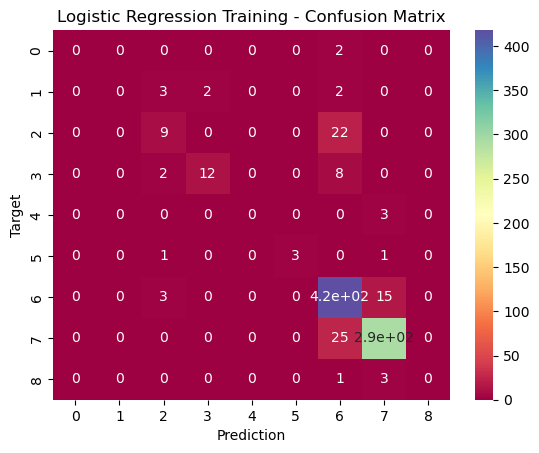

In [102]:
sns.heatmap(log_train_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Logistic Regression Training - Confusion Matrix')
plt.show()

In [103]:
log_test_cm = confusion_matrix(ytest, log_test_pred)

In [104]:
print("Logistic Regression Testing - Confusion Matrix \n", log_test_cm)

Logistic Regression Testing - Confusion Matrix 
 [[  0   1   0   0   1   0]
 [  0   2   0   0   5   0]
 [  0   0   1   0   0   0]
 [  0   0   0   0   1   0]
 [  0   2   0   0 112   3]
 [  0   0   0   0   2  77]]


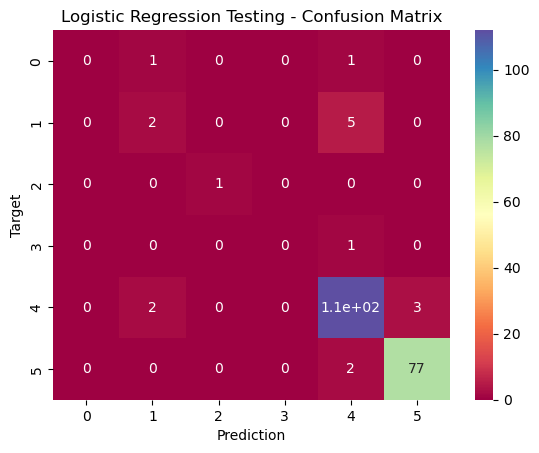

In [105]:
sns.heatmap(log_test_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Logistic Regression Testing - Confusion Matrix')
plt.show()

#### ____________________
# 2 CLASSIFICATION ALGORITHM
#### ____________________

# 2.1 Decision Tree Classifier  


In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
dt = DecisionTreeClassifier()

In [108]:
dt_mod = dt.fit(xtrain, ytrain)

In [109]:
dt_train_pred = dt_mod.predict(xtrain)

In [110]:
dt_train_pred

array([8, 7, 8, 8, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 8, 7, 7, 7, 7, 7,
       2, 7, 7, 8, 0, 7, 7, 7, 3, 7, 7, 7, 7, 7, 8, 8, 2, 7, 7, 8, 7, 8,
       8, 8, 7, 8, 7, 8, 7, 8, 8, 8, 8, 8, 7, 8, 1, 7, 8, 7, 7, 8, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 2, 7, 7, 8, 8, 7, 8, 7, 7, 8, 7, 7, 7, 8, 8,
       7, 8, 3, 7, 8, 8, 8, 8, 8, 7, 8, 7, 8, 7, 7, 8, 7, 8, 2, 7, 3, 7,
       7, 8, 7, 7, 8, 8, 8, 8, 8, 7, 8, 7, 7, 8, 7, 7, 8, 8, 7, 7, 1, 8,
       8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 8, 7, 8, 7, 7, 8, 7, 7, 8, 7,
       8, 8, 7, 2, 8, 8, 7, 7, 8, 8, 7, 8, 8, 8, 7, 4, 7, 7, 7, 8, 8, 8,
       7, 7, 7, 7, 8, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 3, 7, 7, 2, 5, 8, 8,
       7, 7, 8, 8, 9, 7, 3, 7, 7, 7, 7, 8, 7, 8, 7, 8, 7, 7, 7, 7, 7, 7,
       7, 8, 8, 7, 7, 8, 8, 7, 3, 2, 7, 8, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 2, 7, 8, 8, 7, 7, 7, 7, 7, 8, 7, 7, 8, 7, 7, 5, 7, 3, 8,
       8, 7, 7, 7, 7, 8, 8, 7, 7, 7, 8, 8, 8, 8, 7, 7, 8, 8, 7, 8, 7, 5,
       8, 3, 2, 3, 7, 7, 7, 2, 1, 7, 8, 8, 7, 8, 7,

In [111]:
dt_test_pred = dt_mod.predict(xtest)

In [112]:
dt_test_pred

array([7, 8, 7, 7, 8, 7, 3, 8, 7, 7, 7, 8, 7, 7, 2, 7, 8, 7, 8, 7, 8, 8,
       7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 2, 7, 7, 7, 7, 8, 7, 8,
       7, 7, 7, 8, 7, 8, 7, 7, 7, 8, 7, 8, 7, 8, 7, 8, 7, 7, 8, 7, 7, 8,
       7, 8, 7, 7, 7, 8, 7, 8, 7, 8, 8, 8, 7, 8, 8, 8, 7, 8, 7, 8, 7, 7,
       7, 8, 7, 8, 7, 8, 8, 7, 8, 8, 8, 7, 8, 7, 7, 7, 7, 7, 8, 7, 7, 8,
       7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 8, 8, 7, 7, 8, 7, 7, 7, 7, 7, 8,
       8, 8, 7, 7, 2, 8, 7, 8, 8, 7, 7, 8, 7, 8, 7, 8, 7, 7, 8, 8, 7, 8,
       7, 7, 7, 7, 7, 8, 2, 8, 7, 3, 7, 8, 8, 7, 8, 8, 8, 7, 8, 9, 7, 7,
       7, 7, 7, 7, 7, 8, 4, 8, 8, 7, 7, 7, 3, 2, 8, 7, 8, 8, 8, 7, 8, 8,
       7, 7, 8, 7, 7, 7, 3, 7, 7], dtype=int8)

[Text(0.3821875, 0.9615384615384616, 'x[3] <= -0.202\ngini = 0.573\nsamples = 828\nvalue = [2, 7, 31, 22, 3, 5, 436, 318, 4]'),
 Text(0.16, 0.8846153846153846, 'x[2] <= -0.007\ngini = 0.193\nsamples = 441\nvalue = [2, 2, 20, 0, 0, 0, 395, 22, 0]'),
 Text(0.14, 0.8076923076923077, 'gini = 0.0\nsamples = 279\nvalue = [0, 0, 0, 0, 0, 0, 279, 0, 0]'),
 Text(0.18, 0.8076923076923077, 'x[2] <= 0.012\ngini = 0.453\nsamples = 162\nvalue = [2, 2, 20, 0, 0, 0, 116, 22, 0]'),
 Text(0.16, 0.7307692307692307, 'x[1] <= 0.582\ngini = 0.703\nsamples = 67\nvalue = [2, 2, 20, 0, 0, 0, 21, 22, 0]'),
 Text(0.1, 0.6538461538461539, 'x[1] <= -0.413\ngini = 0.541\nsamples = 43\nvalue = [2, 0, 0, 0, 0, 0, 19, 22, 0]'),
 Text(0.04, 0.5769230769230769, 'x[4] <= -0.396\ngini = 0.366\nsamples = 29\nvalue = [0, 0, 0, 0, 0, 0, 7, 22, 0]'),
 Text(0.02, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 0, 5, 0, 0]'),
 Text(0.06, 0.5, 'x[3] <= -0.359\ngini = 0.153\nsamples = 24\nvalue = [0, 0, 0, 0, 0, 0, 2, 22, 

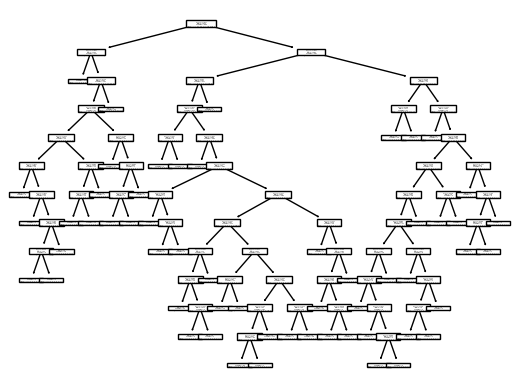

In [113]:
from sklearn import tree
tree.plot_tree(dt_mod)

## 2.1.1 Performance Metrics 

### 2.1.1.1 Accuracy Score

In [114]:
print("Decision Tree Training - Accuracy Score: ",accuracy_score(ytrain, dt_train_pred))

Decision Tree Training - Accuracy Score:  0.998792270531401


In [115]:
print("Decision Tree Testing - Accuracy Score: ",accuracy_score(ytest, dt_test_pred))

Decision Tree Testing - Accuracy Score:  0.9516908212560387


The model performed with a 99 % accuracy during the training phase. However, the accuracy has come way down to 91% during the testing phase. This is a sign of overfitting. 

### 2.1.1.2 Classification Report

In [116]:
dt_train_cr = classification_report(ytrain, dt_train_pred)
print("Logistic Regression Training - Classification Report \n\n", dt_train_cr)

Logistic Regression Training - Classification Report 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         7
           2       1.00      0.97      0.98        31
           3       0.96      1.00      0.98        22
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           7       1.00      1.00      1.00       436
           8       1.00      1.00      1.00       318
           9       1.00      1.00      1.00         4

    accuracy                           1.00       828
   macro avg       1.00      1.00      1.00       828
weighted avg       1.00      1.00      1.00       828



In [117]:
dt_test_cr = classification_report(ytest, dt_test_pred)
print("Decision Tree Testing - Classification Report \n\n", dt_test_cr)

Decision Tree Testing - Classification Report 

               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.83      0.71      0.77         7
           3       0.25      1.00      0.40         1
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.97      0.99      0.98       117
           8       1.00      0.95      0.97        79
           9       0.00      0.00      0.00         0

    accuracy                           0.95       207
   macro avg       0.38      0.46      0.39       207
weighted avg       0.96      0.95      0.95       207



### 2.1.1.3 Confusion Matrix

In [118]:
dt_train_cm = confusion_matrix(ytrain, dt_train_pred)
print("Decision Tree Training - Confusion Matrix \n", dt_train_cm)

Decision Tree Training - Confusion Matrix 
 [[  2   0   0   0   0   0   0   0   0]
 [  0   7   0   0   0   0   0   0   0]
 [  0   0  30   1   0   0   0   0   0]
 [  0   0   0  22   0   0   0   0   0]
 [  0   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   5   0   0   0]
 [  0   0   0   0   0   0 436   0   0]
 [  0   0   0   0   0   0   0 318   0]
 [  0   0   0   0   0   0   0   0   4]]


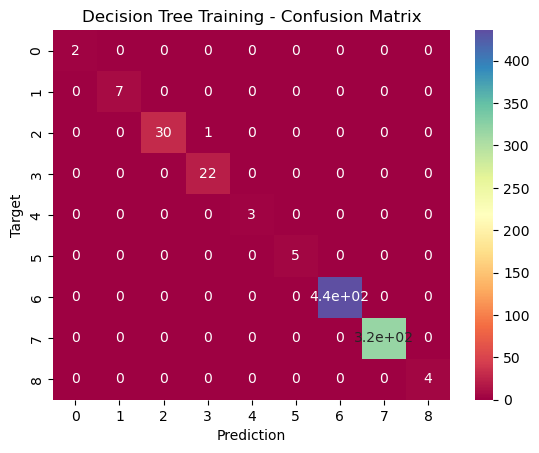

In [119]:
sns.heatmap(dt_train_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Decision Tree Training - Confusion Matrix')
plt.show()

In [120]:
dt_test_cm = confusion_matrix(ytest, dt_test_pred)
print("Logistic Regression Testing - Confusion Matrix \n", dt_test_cm)

Logistic Regression Testing - Confusion Matrix 
 [[  0   0   1   0   0   1   0   0]
 [  0   5   2   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0]
 [  0   1   0   0   0 116   0   0]
 [  0   0   0   1   0   2  75   1]
 [  0   0   0   0   0   0   0   0]]


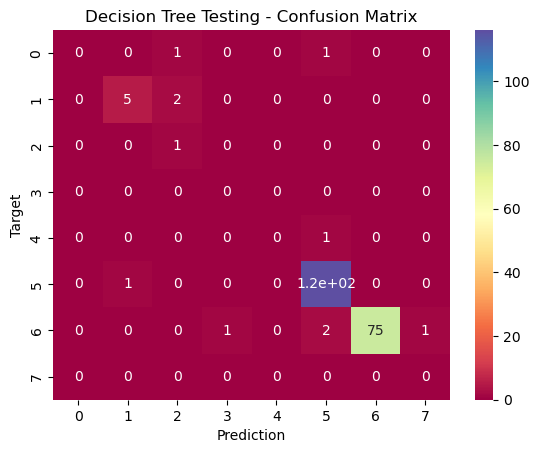

In [121]:
sns.heatmap(dt_test_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Decision Tree Testing - Confusion Matrix')
plt.show()

## Hyperparameter tuning using Gridsearch CV 

In [122]:
param_dict = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': range(1,10), 
    'min_samples_split': range(1,10), 
    'min_samples_leaf': range(1,5)
}

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
grid = GridSearchCV(dt, param_grid = param_dict , cv = 10, verbose = 1, n_jobs=-1)
grid.fit(xtrain, ytrain)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [125]:
grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)>

In [126]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [127]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_split=6)

In [128]:
grid.best_score_

0.9516896855715545

## 2.1.2 Redefining the model 

In [129]:
grid_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, min_samples_leaf = 1, min_samples_split = 2)

In [130]:
grid_dt_mod = grid_dt.fit(xtrain,ytrain)

In [131]:
grid_dt_train_pred = grid_dt_mod.predict(xtrain)
grid_dt_train_pred

array([8, 7, 8, 8, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 8, 7, 7, 7, 7, 7,
       2, 7, 7, 8, 0, 7, 7, 7, 3, 7, 7, 7, 7, 7, 8, 8, 2, 7, 7, 8, 7, 8,
       8, 8, 7, 8, 7, 8, 7, 8, 8, 8, 8, 8, 7, 8, 1, 7, 8, 7, 7, 8, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 2, 7, 7, 8, 8, 7, 8, 7, 7, 8, 7, 7, 7, 8, 8,
       7, 8, 3, 7, 8, 8, 8, 8, 8, 7, 8, 7, 8, 7, 7, 8, 7, 8, 2, 7, 3, 7,
       7, 8, 7, 7, 8, 8, 8, 8, 8, 7, 8, 7, 7, 8, 7, 7, 8, 8, 7, 7, 1, 8,
       8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 8, 7, 8, 7, 7, 8, 7, 7, 8, 7,
       8, 8, 7, 2, 8, 8, 8, 7, 8, 8, 7, 8, 8, 8, 7, 4, 7, 7, 7, 8, 8, 8,
       7, 7, 7, 7, 8, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 3, 7, 7, 2, 5, 8, 8,
       7, 7, 8, 8, 8, 7, 3, 7, 7, 7, 7, 8, 7, 8, 7, 8, 7, 7, 7, 7, 7, 7,
       7, 8, 8, 7, 7, 8, 8, 7, 3, 2, 7, 8, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 2, 7, 8, 8, 7, 7, 7, 7, 7, 8, 7, 7, 8, 7, 7, 5, 7, 3, 8,
       8, 7, 7, 7, 7, 8, 8, 7, 7, 7, 8, 8, 8, 8, 7, 7, 8, 8, 7, 8, 7, 5,
       8, 3, 2, 3, 7, 7, 7, 2, 3, 7, 8, 8, 7, 8, 7,

In [132]:
grid_dt_test_pred = grid_dt_mod.predict(xtest)
grid_dt_test_pred

array([7, 8, 7, 7, 8, 7, 3, 8, 7, 7, 7, 8, 7, 7, 2, 7, 8, 7, 8, 7, 8, 8,
       7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 2, 7, 7, 7, 7, 8, 7, 8,
       7, 7, 7, 8, 7, 8, 7, 7, 7, 8, 7, 8, 9, 8, 7, 8, 7, 7, 8, 7, 7, 8,
       7, 8, 7, 7, 7, 8, 7, 8, 7, 8, 8, 8, 7, 8, 8, 8, 7, 8, 7, 8, 7, 7,
       7, 8, 7, 8, 7, 8, 8, 7, 8, 8, 8, 7, 8, 7, 7, 7, 7, 7, 8, 7, 7, 8,
       7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 8, 8, 7, 7, 8, 7, 7, 7, 7, 7, 8,
       8, 8, 7, 7, 2, 8, 7, 8, 8, 7, 7, 8, 7, 8, 7, 8, 7, 7, 8, 8, 7, 8,
       7, 8, 7, 7, 7, 8, 2, 8, 7, 3, 7, 8, 8, 7, 8, 8, 8, 7, 8, 8, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 8, 8, 7, 7, 7, 3, 2, 8, 7, 8, 8, 8, 7, 8, 8,
       7, 7, 8, 7, 7, 7, 3, 7, 7], dtype=int8)

### 2.1.2.1 Performance Metrics 

#### 2.1.2.1.1 Accuracy Score

In [133]:
print("Decision Tree Training - Accuracy Score (After GridSearchCV): ",accuracy_score(ytrain, grid_dt_train_pred))

Decision Tree Training - Accuracy Score (After GridSearchCV):  0.9806763285024155


In [134]:
print("Decision Tree Testing - Accuracy Score (After GridSearchCV): ",accuracy_score(ytest, grid_dt_test_pred))

Decision Tree Testing - Accuracy Score (After GridSearchCV):  0.961352657004831


The model performed with a 98 % accuracy during the training phase. However, the accuracy has come way down to 92% during the testing phase. This is a sign of overfitting.

#### 2.1.2.1.2 Classification Report

In [135]:

grid_dt_train_cr = classification_report(ytrain, grid_dt_train_pred)
print("Logistic Regression Training - Classification Report \n\n", grid_dt_train_cr)


Logistic Regression Training - Classification Report 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.57      0.73         7
           2       0.97      0.94      0.95        31
           3       0.81      1.00      0.90        22
           4       0.67      0.67      0.67         3
           5       1.00      0.80      0.89         5
           7       1.00      0.99      0.99       436
           8       0.97      1.00      0.99       318
           9       1.00      0.25      0.40         4

    accuracy                           0.98       828
   macro avg       0.94      0.80      0.83       828
weighted avg       0.98      0.98      0.98       828



In [136]:
grid_dt_test_cr = classification_report(ytest, grid_dt_test_pred)
print("Logistic Regression Testing - Classification Report \n\n", grid_dt_test_cr)

Logistic Regression Testing - Classification Report 

               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.83      0.71      0.77         7
           3       0.25      1.00      0.40         1
           6       0.00      0.00      0.00         1
           7       0.97      0.98      0.98       117
           8       1.00      0.99      0.99        79
           9       0.00      0.00      0.00         0

    accuracy                           0.96       207
   macro avg       0.44      0.53      0.45       207
weighted avg       0.96      0.96      0.96       207



#### 2.1.2.1.3 Confusion Matrix

In [137]:
grid_dt_train_cm = confusion_matrix(ytrain, grid_dt_train_pred)
print("Decision Tree Training(GridSearch)- Confusion Matrix \n", grid_dt_train_cm)

Decision Tree Training(GridSearch)- Confusion Matrix 
 [[  2   0   0   0   0   0   0   0   0]
 [  0   4   1   2   0   0   0   0   0]
 [  0   0  29   2   0   0   0   0   0]
 [  0   0   0  22   0   0   0   0   0]
 [  0   0   0   0   2   0   0   1   0]
 [  0   0   0   0   1   4   0   0   0]
 [  0   0   0   1   0   0 430   5   0]
 [  0   0   0   0   0   0   0 318   0]
 [  0   0   0   0   0   0   0   3   1]]


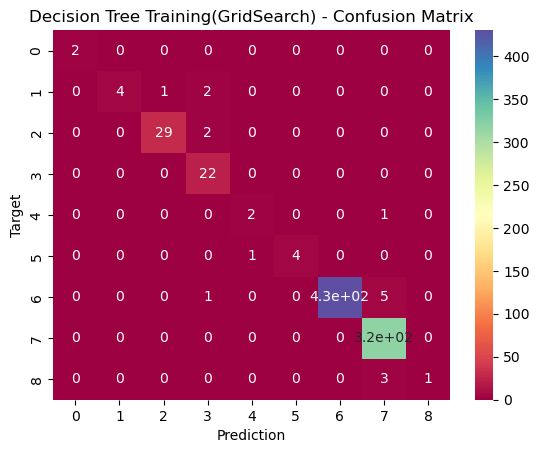

In [138]:
sns.heatmap(grid_dt_train_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Decision Tree Training(GridSearch) - Confusion Matrix')
plt.show()

In [139]:
grid_dt_test_cm = confusion_matrix(ytest, grid_dt_test_pred)
print("Decision Tree Testing(GridSearch) - Confusion Matrix \n", grid_dt_test_cm)

Decision Tree Testing(GridSearch) - Confusion Matrix 
 [[  0   0   1   0   1   0   0]
 [  0   5   2   0   0   0   0]
 [  0   0   1   0   0   0   0]
 [  0   0   0   0   1   0   0]
 [  0   1   0   0 115   0   1]
 [  0   0   0   0   1  78   0]
 [  0   0   0   0   0   0   0]]


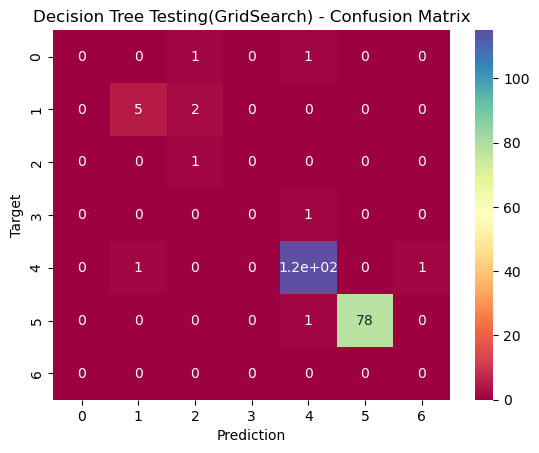

In [140]:
sns.heatmap(grid_dt_test_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Decision Tree Testing(GridSearch) - Confusion Matrix')
plt.show()

In [141]:
## As gini is suggested for best, but Iam going to try with entropy

grid_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 1, min_samples_split = 2)

In [142]:
grid_dt_mod = grid_dt.fit(xtrain,ytrain)

In [143]:
grid_dt_train_pred = grid_dt_mod.predict(xtrain)
grid_dt_train_pred

array([8, 7, 8, 8, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 8, 7, 7, 7, 7, 7,
       2, 7, 7, 8, 0, 7, 7, 7, 3, 7, 7, 7, 7, 7, 8, 8, 2, 7, 7, 8, 7, 8,
       8, 8, 7, 8, 7, 8, 7, 8, 8, 8, 8, 8, 7, 8, 1, 7, 8, 7, 7, 8, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 2, 7, 7, 8, 8, 7, 8, 7, 7, 8, 7, 7, 7, 8, 8,
       7, 8, 3, 7, 8, 8, 8, 8, 8, 7, 8, 7, 8, 7, 7, 8, 7, 8, 2, 7, 3, 7,
       7, 8, 7, 7, 8, 8, 8, 8, 8, 7, 8, 7, 7, 8, 7, 7, 8, 8, 7, 7, 1, 8,
       8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 8, 7, 8, 7, 7, 8, 7, 7, 8, 7,
       8, 8, 7, 2, 8, 8, 8, 7, 8, 8, 7, 8, 8, 8, 7, 4, 7, 7, 7, 8, 8, 8,
       7, 7, 7, 7, 8, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 3, 7, 7, 2, 5, 8, 8,
       7, 7, 8, 8, 9, 7, 3, 7, 7, 7, 7, 8, 7, 8, 7, 8, 7, 7, 7, 7, 7, 7,
       7, 8, 8, 7, 7, 8, 8, 7, 3, 2, 7, 8, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 2, 7, 8, 8, 7, 7, 7, 7, 7, 8, 7, 7, 8, 7, 7, 5, 7, 3, 8,
       8, 7, 7, 7, 7, 8, 8, 7, 7, 7, 8, 8, 8, 8, 7, 7, 8, 8, 7, 8, 7, 5,
       8, 3, 2, 3, 7, 7, 7, 2, 7, 7, 8, 8, 7, 8, 7,

In [144]:
grid_dt_test_pred = grid_dt_mod.predict(xtest)
grid_dt_test_pred

array([7, 8, 7, 7, 8, 7, 3, 8, 7, 7, 7, 8, 7, 7, 2, 7, 8, 7, 8, 7, 8, 8,
       7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 2, 7, 7, 7, 7, 8, 7, 8,
       7, 7, 7, 8, 7, 8, 7, 7, 7, 8, 7, 8, 3, 8, 7, 8, 7, 7, 8, 7, 7, 8,
       7, 8, 7, 7, 7, 8, 7, 8, 7, 8, 8, 8, 7, 8, 8, 8, 7, 8, 8, 8, 7, 7,
       7, 8, 7, 8, 7, 8, 8, 7, 8, 8, 8, 7, 8, 7, 7, 7, 7, 7, 8, 7, 7, 8,
       7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 8, 8, 7, 7, 8, 7, 7, 7, 7, 7, 8,
       8, 8, 7, 7, 2, 8, 7, 8, 8, 7, 7, 8, 7, 8, 7, 8, 7, 7, 8, 8, 7, 8,
       7, 8, 7, 7, 7, 8, 2, 8, 7, 3, 7, 8, 8, 7, 8, 8, 8, 7, 8, 8, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 8, 8, 7, 7, 7, 3, 2, 8, 7, 8, 8, 8, 7, 8, 8,
       7, 7, 8, 7, 7, 7, 3, 7, 7], dtype=int8)

## Performance Metrics 

### Accuracy Score

In [145]:
print("Decision Tree Training - Accuracy Score (After GridSearchCV): ",accuracy_score(ytrain, grid_dt_train_pred))

Decision Tree Training - Accuracy Score (After GridSearchCV):  0.9818840579710145


In [146]:
print("Decision Tree Testing - Accuracy Score (After GridSearchCV): ",accuracy_score(ytest, grid_dt_test_pred))

Decision Tree Testing - Accuracy Score (After GridSearchCV):  0.9565217391304348


In [147]:
### It remains same as we did for gini. Also another factor is we dint change any other values.

# 2.2 Building a Random Forest model

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rf = RandomForestClassifier()

In [150]:
rf_mod = rf.fit(xtrain,ytrain)

In [151]:
rf_train_pred = rf_mod.predict(xtrain)

In [152]:
rf_train_pred

array([8, 7, 8, 8, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 8, 7, 7, 7, 7, 7,
       2, 7, 7, 8, 0, 7, 7, 7, 3, 7, 7, 7, 7, 7, 8, 8, 2, 7, 7, 8, 7, 8,
       8, 8, 7, 8, 7, 8, 7, 8, 8, 8, 8, 8, 7, 8, 1, 7, 8, 7, 7, 8, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 2, 7, 7, 8, 8, 7, 8, 7, 7, 8, 7, 7, 7, 8, 8,
       7, 8, 3, 7, 8, 8, 8, 8, 8, 7, 8, 7, 8, 7, 7, 8, 7, 8, 2, 7, 3, 7,
       7, 8, 7, 7, 8, 8, 8, 8, 8, 7, 8, 7, 7, 8, 7, 7, 8, 8, 7, 7, 1, 8,
       8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 8, 7, 8, 7, 7, 8, 7, 7, 8, 7,
       8, 8, 7, 2, 8, 8, 7, 7, 8, 8, 7, 8, 8, 8, 7, 4, 7, 7, 7, 8, 8, 8,
       7, 7, 7, 7, 8, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 3, 7, 7, 2, 5, 8, 8,
       7, 7, 8, 8, 9, 7, 3, 7, 7, 7, 7, 8, 7, 8, 7, 8, 7, 7, 7, 7, 7, 7,
       7, 8, 8, 7, 7, 8, 8, 7, 3, 2, 7, 8, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 2, 7, 8, 8, 7, 7, 7, 7, 7, 8, 7, 7, 8, 7, 7, 5, 7, 3, 8,
       8, 7, 7, 7, 7, 8, 8, 7, 7, 7, 8, 8, 8, 8, 7, 7, 8, 8, 7, 8, 7, 5,
       8, 3, 2, 3, 7, 7, 7, 2, 1, 7, 8, 8, 7, 8, 7,

In [153]:
rf_test_pred = rf_mod.predict(xtest)

In [154]:
rf_test_pred

array([7, 8, 7, 7, 8, 7, 3, 8, 7, 7, 7, 8, 7, 7, 2, 7, 8, 7, 8, 7, 8, 8,
       7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 2, 7, 7, 7, 7, 8, 7, 8,
       7, 7, 7, 8, 7, 8, 7, 7, 7, 8, 7, 8, 7, 8, 7, 8, 7, 7, 8, 7, 7, 8,
       7, 8, 7, 7, 7, 8, 7, 8, 7, 8, 8, 8, 7, 8, 8, 8, 7, 8, 8, 8, 7, 7,
       7, 8, 7, 8, 7, 8, 8, 7, 8, 8, 8, 7, 8, 7, 7, 7, 7, 7, 8, 7, 7, 8,
       7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 8, 8, 7, 7, 8, 7, 7, 7, 7, 7, 8,
       8, 8, 7, 7, 2, 8, 7, 8, 8, 7, 7, 8, 7, 8, 7, 8, 7, 7, 8, 8, 7, 8,
       7, 8, 7, 7, 7, 8, 2, 8, 7, 3, 7, 8, 8, 7, 8, 8, 8, 7, 8, 8, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 8, 8, 7, 7, 7, 3, 2, 8, 7, 8, 8, 8, 7, 8, 8,
       7, 7, 8, 7, 7, 7, 3, 7, 7], dtype=int8)

## 2.2.1 Performance Metrics  

### 2.2.1.1 Accuracy Score 

In [155]:
print("Random Forest Training - Accuracy Score:", accuracy_score(ytrain, rf_train_pred))

Random Forest Training - Accuracy Score: 0.998792270531401


In [156]:
print("Random Forest Testing - Accuracy Score:", accuracy_score(ytest, rf_test_pred))

Random Forest Testing - Accuracy Score: 0.961352657004831


The model performed with a 99 % accuracy during the training phase. However, the accuracy has come way down to 93% during the testing phase. This is a sign of overfitting. 

### 2.2.1.2 Classification Report

In [157]:
rf_train_cr = classification_report(ytrain, rf_train_pred)
print("Random Forest Training- Classification Report: \n", rf_train_cr)

Random Forest Training- Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         7
           2       1.00      0.97      0.98        31
           3       0.96      1.00      0.98        22
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           7       1.00      1.00      1.00       436
           8       1.00      1.00      1.00       318
           9       1.00      1.00      1.00         4

    accuracy                           1.00       828
   macro avg       1.00      1.00      1.00       828
weighted avg       1.00      1.00      1.00       828



In [158]:
rf_test_cr = classification_report(ytest, rf_test_pred)
print("Random Forest Testing - Classification Report : \n", rf_test_cr)

Random Forest Testing - Classification Report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.83      0.71      0.77         7
           3       0.25      1.00      0.40         1
           6       0.00      0.00      0.00         1
           7       0.97      0.98      0.98       117
           8       0.99      0.99      0.99        79

    accuracy                           0.96       207
   macro avg       0.51      0.61      0.52       207
weighted avg       0.96      0.96      0.96       207



### 2.2.1 Confusion Matrix

In [159]:
rf_train_cm = confusion_matrix(ytrain, rf_train_pred)
print("Random Forest Training - Confusion Matrix \n", grid_dt_train_cm)

Random Forest Training - Confusion Matrix 
 [[  2   0   0   0   0   0   0   0   0]
 [  0   4   1   2   0   0   0   0   0]
 [  0   0  29   2   0   0   0   0   0]
 [  0   0   0  22   0   0   0   0   0]
 [  0   0   0   0   2   0   0   1   0]
 [  0   0   0   0   1   4   0   0   0]
 [  0   0   0   1   0   0 430   5   0]
 [  0   0   0   0   0   0   0 318   0]
 [  0   0   0   0   0   0   0   3   1]]


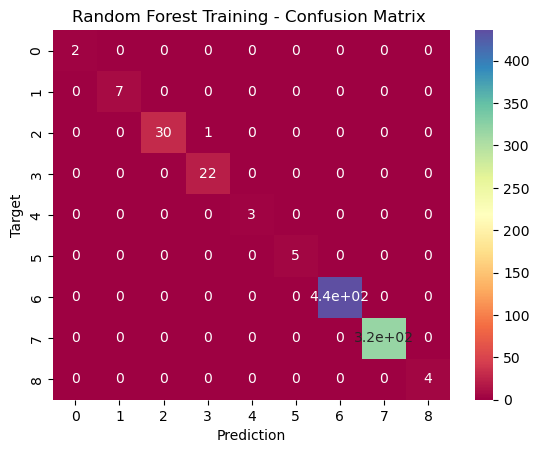

In [160]:
sns.heatmap(rf_train_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Random Forest Training - Confusion Matrix ')
plt.show()

In [161]:
rf_test_cm = confusion_matrix(ytest, rf_test_pred)
print("Random Forest Testing - Confusion Matrix \n", rf_test_cm)

Random Forest Testing - Confusion Matrix 
 [[  0   0   1   0   1   0]
 [  0   5   2   0   0   0]
 [  0   0   1   0   0   0]
 [  0   0   0   0   1   0]
 [  0   1   0   0 115   1]
 [  0   0   0   0   1  78]]


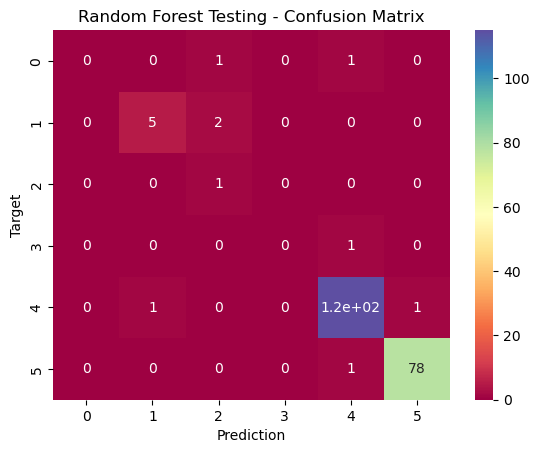

In [162]:
sns.heatmap(rf_test_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Random Forest Testing - Confusion Matrix')
plt.show()

In [163]:
grid.fit(xtrain,ytrain)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [164]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [165]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_split=4)

## 2.2.2 Redefining the model

In [166]:
grid_rf = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=1, min_samples_split=2)

In [167]:
grid_rf_mod = grid_rf.fit(xtrain, ytrain)

In [168]:
grid_rf_train_pred = grid_rf_mod.predict(xtrain)
grid_rf_train_pred

array([8, 7, 8, 8, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 8, 7, 7, 7, 7, 7,
       2, 7, 7, 8, 0, 7, 7, 7, 3, 7, 7, 7, 7, 7, 8, 8, 2, 7, 7, 8, 7, 8,
       8, 8, 7, 8, 7, 8, 7, 8, 8, 8, 8, 8, 7, 8, 1, 7, 8, 7, 7, 8, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 2, 7, 7, 8, 8, 7, 8, 7, 7, 8, 7, 7, 7, 8, 8,
       7, 8, 3, 7, 8, 8, 8, 8, 8, 7, 8, 7, 8, 7, 7, 8, 7, 8, 2, 7, 3, 7,
       7, 8, 7, 7, 8, 8, 8, 8, 8, 7, 8, 7, 7, 8, 7, 7, 8, 8, 7, 7, 1, 8,
       8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 8, 7, 8, 7, 7, 8, 7, 7, 8, 7,
       8, 8, 7, 2, 8, 8, 8, 7, 8, 8, 7, 8, 8, 8, 7, 4, 7, 7, 7, 8, 8, 8,
       7, 7, 7, 7, 8, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 3, 7, 7, 2, 5, 8, 8,
       7, 7, 8, 8, 8, 7, 3, 7, 7, 7, 7, 8, 7, 8, 7, 8, 7, 7, 7, 7, 7, 7,
       7, 8, 8, 7, 7, 8, 8, 7, 3, 2, 7, 8, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 2, 7, 8, 8, 7, 7, 7, 7, 7, 8, 7, 7, 8, 7, 7, 5, 7, 3, 8,
       8, 7, 7, 7, 7, 8, 8, 7, 7, 7, 8, 8, 8, 8, 7, 7, 8, 8, 7, 8, 7, 5,
       8, 3, 2, 3, 7, 7, 7, 2, 3, 7, 8, 8, 7, 8, 7,

In [169]:
grid_rf_test_pred = grid_rf_mod.predict(xtest)
grid_rf_test_pred

array([7, 8, 7, 7, 8, 7, 3, 8, 7, 7, 7, 8, 7, 7, 2, 7, 8, 7, 8, 7, 8, 8,
       7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 2, 7, 7, 7, 7, 8, 7, 8,
       7, 7, 7, 8, 7, 8, 7, 7, 7, 8, 7, 8, 9, 8, 7, 8, 7, 7, 8, 7, 7, 8,
       7, 8, 7, 7, 7, 8, 7, 8, 7, 8, 8, 8, 7, 8, 8, 8, 7, 8, 7, 8, 7, 7,
       7, 8, 7, 8, 7, 8, 8, 7, 8, 8, 8, 7, 8, 7, 7, 7, 7, 7, 8, 7, 7, 8,
       7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 8, 8, 7, 7, 8, 7, 7, 7, 7, 7, 8,
       8, 8, 7, 7, 2, 8, 7, 8, 8, 7, 7, 8, 7, 8, 7, 8, 7, 7, 8, 8, 7, 8,
       7, 8, 7, 7, 7, 8, 2, 8, 7, 3, 7, 8, 8, 7, 8, 8, 8, 7, 8, 8, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 8, 8, 7, 7, 7, 3, 2, 8, 7, 8, 8, 8, 7, 8, 8,
       7, 7, 8, 7, 7, 7, 3, 7, 7], dtype=int8)

### 2.2.2.1 Performance Metrics 

#### 2.2.2.1.1 Accuracy Score

In [170]:
print("Random Forest Training - Accuracy Score (After GridSearchCV): ",accuracy_score(ytrain, grid_rf_train_pred))

Random Forest Training - Accuracy Score (After GridSearchCV):  0.9806763285024155


In [171]:
print("Random Forest Testing - Accuracy Score (After GridSearchCV): ",accuracy_score(ytest, grid_rf_test_pred))

Random Forest Testing - Accuracy Score (After GridSearchCV):  0.961352657004831


The model performed with a 98 % accuracy during the training phase. However, the accuracy has come way down to 92% during the testing phase. This is a sign of overfitting.

#### 2.2.2.1.2 Classification Report

In [172]:
grid_rf_train_cr = classification_report(ytrain, grid_rf_train_pred)
print("Random Forest Tree Training - Classification Report (After GridSearchCV): \n", grid_rf_train_cr)

Random Forest Tree Training - Classification Report (After GridSearchCV): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.57      0.73         7
           2       0.97      0.94      0.95        31
           3       0.81      1.00      0.90        22
           4       0.67      0.67      0.67         3
           5       1.00      0.80      0.89         5
           7       1.00      0.99      0.99       436
           8       0.97      1.00      0.99       318
           9       1.00      0.25      0.40         4

    accuracy                           0.98       828
   macro avg       0.94      0.80      0.83       828
weighted avg       0.98      0.98      0.98       828



In [173]:
grid_rf_test_cr = classification_report(ytest, grid_rf_test_pred)
print("Random Forest Tree Testing - Classification Report (After GridSearchCV): \n", grid_rf_test_cr)

Random Forest Tree Testing - Classification Report (After GridSearchCV): 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.83      0.71      0.77         7
           3       0.25      1.00      0.40         1
           6       0.00      0.00      0.00         1
           7       0.97      0.98      0.98       117
           8       1.00      0.99      0.99        79
           9       0.00      0.00      0.00         0

    accuracy                           0.96       207
   macro avg       0.44      0.53      0.45       207
weighted avg       0.96      0.96      0.96       207



#### 2.2.2.1.3 Confusion Matrix

In [174]:
grid_rf_train_cm = confusion_matrix(ytrain, grid_rf_train_pred)
print("Random Forest Tree Training - Confusion Matrix (After GridSearchCV)\n", grid_rf_train_cm)

Random Forest Tree Training - Confusion Matrix (After GridSearchCV)
 [[  2   0   0   0   0   0   0   0   0]
 [  0   4   1   2   0   0   0   0   0]
 [  0   0  29   2   0   0   0   0   0]
 [  0   0   0  22   0   0   0   0   0]
 [  0   0   0   0   2   0   0   1   0]
 [  0   0   0   0   1   4   0   0   0]
 [  0   0   0   1   0   0 430   5   0]
 [  0   0   0   0   0   0   0 318   0]
 [  0   0   0   0   0   0   0   3   1]]


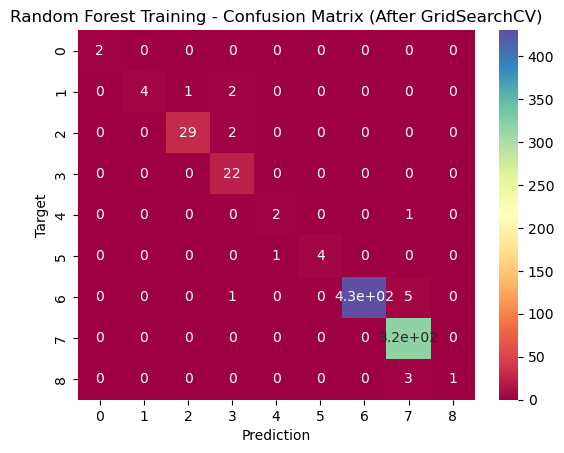

In [175]:
sns.heatmap(grid_rf_train_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Random Forest Training - Confusion Matrix (After GridSearchCV)')
plt.show()

In [176]:
grid_rf_test_cm = confusion_matrix(ytest, grid_rf_test_pred)
print("Random Forest Tree Testing - Confusion Matrix (After GridSearchCV)\n", grid_rf_test_cm)

Random Forest Tree Testing - Confusion Matrix (After GridSearchCV)
 [[  0   0   1   0   1   0   0]
 [  0   5   2   0   0   0   0]
 [  0   0   1   0   0   0   0]
 [  0   0   0   0   1   0   0]
 [  0   1   0   0 115   0   1]
 [  0   0   0   0   1  78   0]
 [  0   0   0   0   0   0   0]]


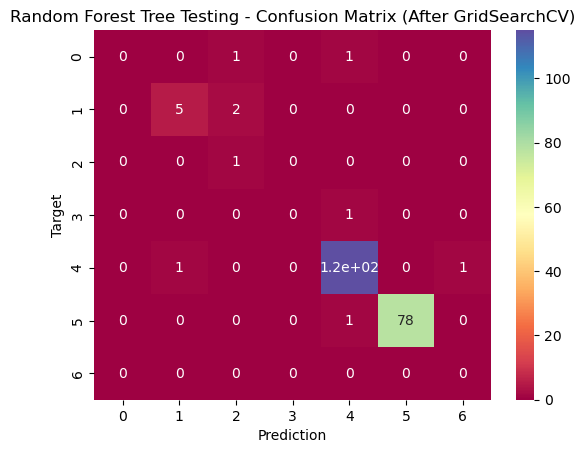

In [177]:
sns.heatmap(grid_rf_test_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Random Forest Tree Testing - Confusion Matrix (After GridSearchCV)')
plt.show()

# 2.3 Building KNN Model

In [178]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
knn = KNeighborsClassifier(5)

In [180]:
knn.n_neighbors

5

In [181]:
knn_mod = knn.fit(xtrain,ytrain)

In [182]:
knn_train_pred = knn_mod.predict(xtrain)
knn_train_pred

array([8, 7, 8, 8, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 8, 7, 7, 7, 7, 7,
       2, 7, 7, 8, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 8, 8, 2, 7, 7, 8, 7, 8,
       8, 8, 7, 8, 7, 8, 7, 8, 8, 8, 8, 8, 7, 8, 1, 7, 3, 7, 7, 8, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 1, 7, 7, 8, 8, 7, 8, 7, 7, 8, 7, 7, 7, 8, 8,
       7, 8, 3, 7, 8, 8, 8, 8, 8, 7, 8, 7, 8, 7, 7, 8, 7, 8, 2, 7, 3, 7,
       7, 8, 7, 7, 8, 8, 8, 8, 8, 7, 8, 7, 7, 8, 7, 7, 8, 8, 7, 7, 1, 8,
       8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 2, 8, 7, 8, 7, 7, 8, 7, 7, 8, 7,
       8, 8, 7, 2, 8, 8, 8, 7, 8, 8, 7, 8, 8, 8, 8, 8, 7, 7, 7, 8, 8, 8,
       7, 7, 7, 7, 8, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 3, 7, 7, 2, 5, 8, 8,
       7, 7, 8, 8, 8, 7, 3, 7, 7, 7, 7, 8, 7, 8, 7, 8, 7, 7, 7, 7, 7, 7,
       7, 8, 8, 7, 7, 8, 8, 7, 1, 2, 7, 8, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 2, 7, 8, 8, 7, 7, 7, 7, 7, 8, 7, 7, 4, 7, 7, 5, 7, 3, 8,
       8, 7, 7, 7, 7, 8, 8, 7, 7, 7, 8, 8, 8, 8, 7, 7, 8, 8, 7, 8, 7, 2,
       8, 3, 2, 3, 7, 7, 7, 2, 3, 7, 8, 8, 7, 8, 7,

In [183]:
knn_test_pred = knn_mod.predict(xtest)
knn_test_pred

array([7, 8, 7, 7, 8, 7, 3, 8, 7, 7, 7, 8, 7, 3, 2, 7, 8, 7, 8, 7, 8, 8,
       7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 2, 7, 7, 7, 7, 8, 7, 8,
       7, 7, 7, 8, 7, 8, 3, 7, 7, 8, 8, 8, 7, 8, 7, 8, 7, 7, 8, 7, 7, 8,
       7, 8, 7, 7, 7, 8, 7, 8, 8, 8, 8, 8, 7, 8, 8, 8, 7, 8, 8, 8, 7, 7,
       7, 8, 7, 8, 7, 8, 8, 7, 8, 8, 8, 7, 8, 7, 7, 7, 7, 7, 8, 7, 7, 8,
       7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 8, 8, 7, 7, 8, 7, 7, 7, 7, 7, 8,
       8, 8, 7, 7, 2, 8, 7, 8, 8, 1, 7, 8, 7, 8, 7, 8, 7, 7, 8, 8, 2, 8,
       7, 8, 7, 7, 7, 8, 2, 8, 7, 7, 7, 8, 8, 7, 8, 8, 8, 7, 8, 8, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 8, 8, 7, 7, 8, 3, 2, 8, 7, 7, 8, 8, 7, 8, 7,
       8, 8, 3, 7, 1, 7, 3, 7, 7], dtype=int8)

## 2.3.1 Performance Metrics  

### 2.3.1.1 Accuracy Metrics 

In [184]:
print("KNN Training - Accuracy Score:", accuracy_score(ytrain, knn_train_pred))

KNN Training - Accuracy Score: 0.9480676328502415


In [185]:
print("KNN Testing - Accuracy Score:", accuracy_score(ytest, knn_test_pred))

KNN Testing - Accuracy Score: 0.9082125603864735


The model performed with a 94 % accuracy during the training phase. However, the accuracy has come way down to 87% during the testing phase. This is a sign of overfitting. 

### 2.3.1.2 Classification Report

In [186]:
knn_train_cr = classification_report(ytrain, knn_train_pred)
print("KNN Training - Classification Report : \n", knn_train_cr)

KNN Training - Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.62      0.71      0.67         7
           2       0.74      0.90      0.81        31
           3       0.86      0.86      0.86        22
           4       0.00      0.00      0.00         3
           5       1.00      0.60      0.75         5
           7       0.98      0.95      0.97       436
           8       0.95      0.99      0.97       318
           9       0.00      0.00      0.00         4

    accuracy                           0.95       828
   macro avg       0.57      0.56      0.56       828
weighted avg       0.94      0.95      0.94       828



In [187]:
knn_test_cr = classification_report(ytest, knn_test_pred)
print("KNN Testing - Classification Report : \n", knn_test_cr)

KNN Testing - Classification Report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.71      0.71      0.71         7
           3       0.17      1.00      0.29         1
           6       0.00      0.00      0.00         1
           7       0.95      0.91      0.93       117
           8       0.94      0.96      0.95        79

    accuracy                           0.91       207
   macro avg       0.46      0.60      0.48       207
weighted avg       0.92      0.91      0.91       207



### 2.3.1.3 Confusion Matrix

In [188]:
knn_train_cm = confusion_matrix(ytrain, knn_train_pred)
print("KNN Training - Confusion Matrix \n", knn_train_cm)

KNN Training - Confusion Matrix 
 [[  0   0   0   0   0   0   2   0   0]
 [  0   5   1   1   0   0   0   0   0]
 [  0   1  28   1   0   0   1   0   0]
 [  0   1   1  19   0   0   1   0   0]
 [  0   0   0   0   0   0   0   3   0]
 [  0   0   1   0   0   3   0   1   0]
 [  0   1   7   0   0   0 416  12   0]
 [  0   0   0   1   1   0   2 314   0]
 [  0   0   0   0   1   0   1   2   0]]


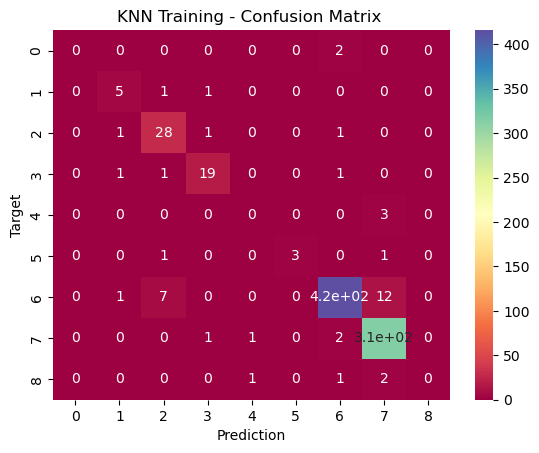

In [189]:
sns.heatmap(knn_train_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('KNN Training - Confusion Matrix ')
plt.show()

In [190]:
knn_test_cm = confusion_matrix(ytest, knn_test_pred)
print("KNN Testing - Confusion Matrix \n", knn_test_cm)

KNN Testing - Confusion Matrix 
 [[  0   0   0   0   2   0]
 [  0   5   2   0   0   0]
 [  0   0   1   0   0   0]
 [  0   0   0   0   1   0]
 [  2   2   2   0 106   5]
 [  0   0   1   0   2  76]]


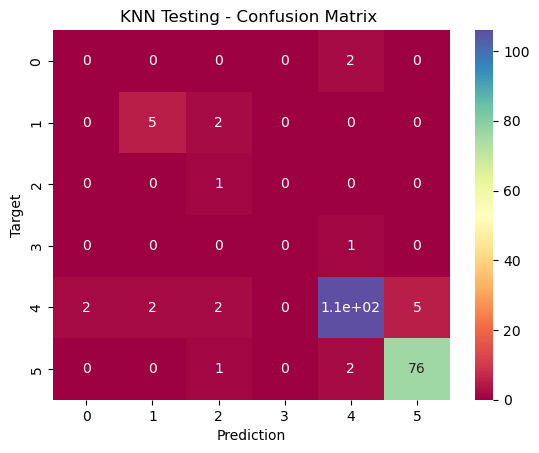

In [191]:
sns.heatmap(knn_test_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('KNN Testing - Confusion Matrix ')
plt.show()

## 2.5.2 Finding the optimal value of K

In [192]:
k_range = range(1, 100)
weight_options = ['uniform', 'distance']

param_grid = dict(n_neighbors = k_range, weights = weight_options)

grid_knn = GridSearchCV(knn_mod, param_grid, cv = 10, scoring = 'accuracy')
grid_knn.fit(xtrain, ytrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [193]:
grid_knn.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')>

In [194]:
grid_knn.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [195]:
grid_knn.best_score_

0.9384072876873347

## 2.3.3 Redefining the model 

In [196]:
grid_knn = KNeighborsClassifier(n_neighbors=4, weights='distance')

In [197]:
grid_knn_mod = grid_knn.fit(xtrain,ytrain)

In [198]:
grid_knn_train_pred = grid_knn_mod.predict(xtrain)
grid_knn_train_pred

array([8, 7, 8, 8, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 8, 7, 7, 7, 7, 7,
       2, 7, 7, 8, 0, 7, 7, 7, 3, 7, 7, 7, 7, 7, 8, 8, 2, 7, 7, 8, 7, 8,
       8, 8, 7, 8, 7, 8, 7, 8, 8, 8, 8, 8, 7, 8, 1, 7, 8, 7, 7, 8, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 2, 7, 7, 8, 8, 7, 8, 7, 7, 8, 7, 7, 7, 8, 8,
       7, 8, 3, 7, 8, 8, 8, 8, 8, 7, 8, 7, 8, 7, 7, 8, 7, 8, 2, 7, 3, 7,
       7, 8, 7, 7, 8, 8, 8, 8, 8, 7, 8, 7, 7, 8, 7, 7, 8, 8, 7, 7, 1, 8,
       8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 8, 7, 8, 7, 7, 8, 7, 7, 8, 7,
       8, 8, 7, 2, 8, 8, 7, 7, 8, 8, 7, 8, 8, 8, 7, 4, 7, 7, 7, 8, 8, 8,
       7, 7, 7, 7, 8, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 3, 7, 7, 2, 5, 8, 8,
       7, 7, 8, 8, 9, 7, 3, 7, 7, 7, 7, 8, 7, 8, 7, 8, 7, 7, 7, 7, 7, 7,
       7, 8, 8, 7, 7, 8, 8, 7, 3, 2, 7, 8, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 2, 7, 8, 8, 7, 7, 7, 7, 7, 8, 7, 7, 8, 7, 7, 5, 7, 3, 8,
       8, 7, 7, 7, 7, 8, 8, 7, 7, 7, 8, 8, 8, 8, 7, 7, 8, 8, 7, 8, 7, 5,
       8, 3, 2, 3, 7, 7, 7, 2, 1, 7, 8, 8, 7, 8, 7,

In [199]:
grid_knn_test_pred = grid_knn_mod.predict(xtest)
grid_knn_test_pred

array([7, 8, 7, 7, 8, 7, 3, 8, 7, 7, 7, 8, 7, 3, 2, 7, 8, 7, 8, 7, 8, 8,
       7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 2, 7, 7, 7, 7, 8, 7, 8,
       7, 7, 7, 8, 7, 8, 3, 7, 7, 8, 7, 8, 7, 8, 7, 8, 7, 7, 8, 7, 7, 8,
       7, 8, 7, 7, 7, 8, 7, 8, 8, 8, 8, 8, 7, 7, 8, 8, 7, 8, 8, 8, 7, 7,
       7, 8, 7, 8, 7, 8, 8, 7, 8, 8, 8, 7, 8, 7, 7, 7, 7, 7, 8, 7, 7, 8,
       7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 8, 8, 7, 7, 8, 7, 7, 7, 7, 7, 8,
       8, 8, 7, 7, 2, 8, 7, 8, 8, 1, 7, 8, 7, 8, 7, 8, 7, 7, 8, 8, 2, 8,
       7, 8, 7, 7, 7, 8, 2, 8, 7, 7, 7, 8, 8, 7, 8, 8, 8, 7, 8, 8, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 8, 8, 7, 7, 8, 3, 2, 8, 7, 7, 8, 8, 7, 8, 7,
       8, 8, 8, 7, 1, 7, 3, 7, 7], dtype=int8)

### 2.3.3.1 Performance Metrics 

#### 2.3.3.1.1 Accuracy Score

In [200]:
print("KNN Training - Accuracy Score (After GridSearchCV): ",accuracy_score(ytrain, grid_knn_train_pred))

KNN Training - Accuracy Score (After GridSearchCV):  0.998792270531401


In [201]:
print("KNN Testing - Accuracy Score (After GridSearchCV): ",accuracy_score(ytest, grid_knn_test_pred))

KNN Testing - Accuracy Score (After GridSearchCV):  0.9130434782608695


The model performed with a 99 % accuracy during the training phase. However, the accuracy has come way down to 90% during the testing phase. This is a sign of overfitting. 

#### 2.3.3.1.2 Classification Report

In [202]:
grid_knn_train_cr = classification_report(ytrain, grid_knn_train_pred)
print("knn Training - Classification Report (After GridSearchCV): \n", grid_knn_train_cr)

knn Training - Classification Report (After GridSearchCV): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         7
           2       1.00      0.97      0.98        31
           3       0.96      1.00      0.98        22
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           7       1.00      1.00      1.00       436
           8       1.00      1.00      1.00       318
           9       1.00      1.00      1.00         4

    accuracy                           1.00       828
   macro avg       1.00      1.00      1.00       828
weighted avg       1.00      1.00      1.00       828



In [203]:
grid_knn_test_cr = classification_report(ytest, grid_knn_test_pred)
print("knn Testing - Classification Report (After GridSearchCV): \n", grid_knn_test_cr)

knn Testing - Classification Report (After GridSearchCV): 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.71      0.71      0.71         7
           3       0.20      1.00      0.33         1
           6       0.00      0.00      0.00         1
           7       0.95      0.91      0.93       117
           8       0.95      0.96      0.96        79

    accuracy                           0.91       207
   macro avg       0.47      0.60      0.49       207
weighted avg       0.92      0.91      0.92       207



#### 2.3.3.1.3 Confusion Matrix

In [204]:
grid_knn_train_cm = confusion_matrix(ytrain, grid_knn_train_pred)
print("knn Training - Confusion Matrix (After GridSearchCV)\n", grid_knn_train_cm)

knn Training - Confusion Matrix (After GridSearchCV)
 [[  2   0   0   0   0   0   0   0   0]
 [  0   7   0   0   0   0   0   0   0]
 [  0   0  30   1   0   0   0   0   0]
 [  0   0   0  22   0   0   0   0   0]
 [  0   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   5   0   0   0]
 [  0   0   0   0   0   0 436   0   0]
 [  0   0   0   0   0   0   0 318   0]
 [  0   0   0   0   0   0   0   0   4]]


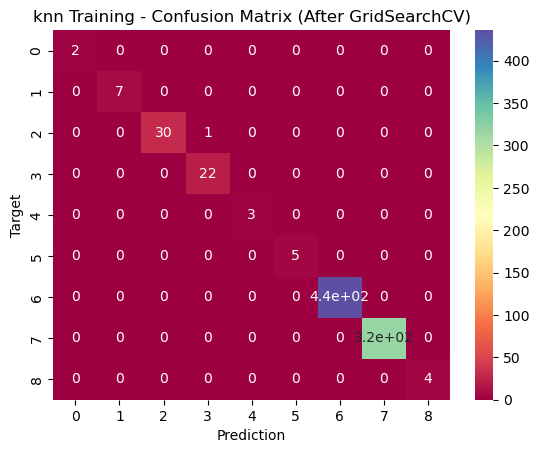

In [205]:
sns.heatmap(grid_knn_train_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('knn Training - Confusion Matrix (After GridSearchCV)')
plt.show()

In [206]:
grid_knn_test_cm = confusion_matrix(ytest, grid_knn_test_pred)
print("knn Testing - Confusion Matrix (After GridSearchCV)\n", grid_knn_test_cm)

knn Testing - Confusion Matrix (After GridSearchCV)
 [[  0   0   0   0   2   0]
 [  0   5   2   0   0   0]
 [  0   0   1   0   0   0]
 [  0   0   0   0   1   0]
 [  2   2   2   0 107   4]
 [  0   0   0   0   3  76]]


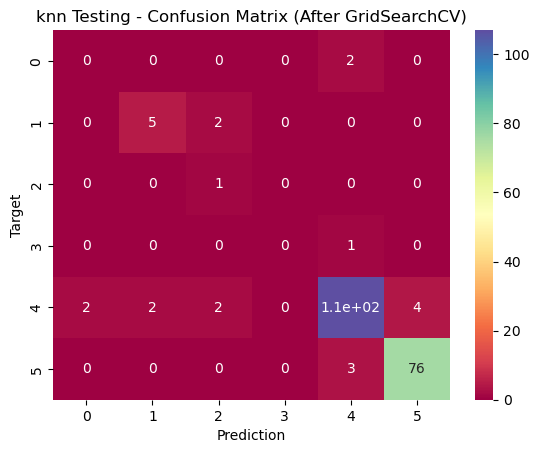

In [207]:
sns.heatmap(grid_knn_test_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('knn Testing - Confusion Matrix (After GridSearchCV)')
plt.show()

# 2.4 Building a Naive Baye's model

In [208]:
from sklearn.naive_bayes import GaussianNB

In [209]:
nb = GaussianNB()

In [210]:
nb_mod = nb.fit(xtrain,ytrain)

In [211]:
nb_train_pred = nb_mod.predict(xtrain)
nb_train_pred

array([9, 7, 9, 9, 7, 2, 7, 2, 7, 7, 7, 7, 7, 7, 4, 7, 8, 7, 7, 7, 7, 7,
       0, 7, 7, 8, 0, 7, 7, 7, 3, 7, 7, 7, 7, 7, 4, 8, 2, 7, 7, 4, 7, 2,
       9, 8, 7, 9, 7, 8, 7, 9, 9, 9, 2, 8, 7, 4, 5, 7, 3, 7, 7, 8, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 2, 7, 7, 8, 8, 7, 9, 7, 7, 8, 7, 7, 7, 8, 4,
       7, 8, 3, 5, 8, 8, 2, 8, 8, 7, 8, 7, 2, 7, 7, 9, 7, 9, 2, 7, 3, 7,
       7, 4, 7, 7, 8, 9, 9, 2, 8, 7, 2, 7, 7, 8, 7, 7, 3, 2, 7, 7, 2, 9,
       4, 7, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 8, 7, 8, 7, 7, 8, 7, 7, 2, 7,
       9, 8, 7, 2, 2, 2, 8, 7, 8, 8, 7, 8, 9, 2, 2, 4, 7, 7, 7, 8, 9, 8,
       7, 7, 7, 7, 9, 8, 2, 4, 7, 2, 7, 2, 7, 8, 7, 3, 7, 7, 2, 5, 9, 4,
       1, 7, 2, 9, 9, 7, 3, 7, 7, 7, 7, 8, 7, 9, 2, 2, 7, 7, 7, 7, 7, 7,
       7, 2, 4, 7, 7, 8, 8, 7, 2, 2, 7, 8, 7, 7, 2, 7, 7, 7, 7, 7, 7, 8,
       8, 2, 8, 0, 7, 2, 8, 7, 7, 7, 7, 7, 4, 1, 7, 9, 7, 7, 5, 7, 3, 8,
       8, 7, 7, 7, 7, 9, 9, 7, 7, 7, 4, 9, 8, 9, 7, 7, 8, 2, 7, 9, 2, 2,
       8, 3, 0, 3, 7, 7, 7, 2, 3, 7, 2, 8, 2, 3, 7,

In [212]:
nb_test_pred = nb_mod.predict(xtest)
nb_test_pred

array([7, 9, 7, 7, 4, 7, 3, 9, 7, 7, 7, 8, 7, 7, 2, 7, 8, 7, 8, 7, 9, 8,
       7, 7, 2, 7, 2, 7, 7, 7, 7, 2, 7, 7, 8, 7, 2, 7, 2, 2, 7, 8, 7, 8,
       7, 7, 7, 2, 7, 2, 7, 7, 7, 9, 2, 4, 9, 3, 7, 9, 7, 7, 8, 7, 7, 8,
       7, 2, 7, 7, 7, 8, 7, 2, 7, 9, 2, 8, 7, 4, 8, 9, 7, 2, 8, 9, 7, 7,
       7, 2, 7, 9, 7, 8, 8, 7, 8, 2, 8, 7, 8, 7, 7, 7, 7, 7, 3, 7, 2, 8,
       7, 7, 8, 7, 7, 5, 7, 7, 7, 4, 7, 4, 9, 7, 7, 5, 7, 7, 7, 2, 1, 2,
       9, 3, 7, 7, 2, 8, 7, 9, 9, 1, 7, 9, 7, 8, 7, 2, 7, 7, 9, 8, 1, 8,
       7, 4, 7, 7, 7, 8, 2, 9, 7, 2, 7, 8, 8, 7, 8, 8, 8, 5, 4, 8, 7, 7,
       7, 7, 7, 7, 7, 9, 4, 8, 8, 7, 7, 8, 3, 2, 8, 7, 5, 9, 9, 7, 9, 4,
       2, 2, 3, 7, 7, 7, 3, 7, 7], dtype=int8)

## 2.4.1 Performance Metrics

### 2.4.1.1 Accuracy Score

In [213]:
print("Naive bayes Training - Accuracy Score: ", accuracy_score(ytrain, nb_train_pred))

Naive bayes Training - Accuracy Score:  0.7089371980676329


In [214]:
print("Naive bayes Testing - Accuracy Score: ", accuracy_score(ytest, nb_test_pred))

Naive bayes Testing - Accuracy Score:  0.6859903381642513


The model performed with a 79 % accuracy during the training phase. However, the accuracy has come way down to 75% during the testing phase. This is a sign of overfitting. 

### 2.4.1.2 Classification Report

In [215]:
nb_train_cr = classification_report(ytrain, nb_train_pred)
print("Naive Baye's Training - Classification Report : \n", nb_train_cr)

Naive Baye's Training - Classification Report : 
               precision    recall  f1-score   support

           0       0.22      1.00      0.36         2
           1       0.14      0.14      0.14         7
           2       0.21      0.77      0.33        31
           3       0.63      0.77      0.69        22
           4       0.08      1.00      0.15         3
           5       0.30      0.60      0.40         5
           7       1.00      0.92      0.95       436
           8       0.99      0.42      0.59       318
           9       0.04      1.00      0.09         4

    accuracy                           0.71       828
   macro avg       0.40      0.74      0.41       828
weighted avg       0.94      0.71      0.77       828



In [216]:
nb_test_cr = classification_report(ytest, nb_test_pred)
print("Naive Baye's Testing - Classification Report : \n", nb_test_cr)

Naive Baye's Testing - Classification Report : 
               precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       0.19      0.71      0.30         7
           3       0.14      1.00      0.25         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       1.00      0.87      0.93       117
           8       0.94      0.42      0.58        79
           9       0.00      0.00      0.00         0

    accuracy                           0.69       207
   macro avg       0.29      0.39      0.27       207
weighted avg       0.94      0.69      0.76       207



### 2.4.1.3 Confusion Matrix

In [217]:
nb_train_cm = confusion_matrix(ytrain, nb_train_pred)
print("Naive Baye's Training - Confusion Matrix \n", nb_train_cm)

Naive Baye's Training - Confusion Matrix 
 [[  2   0   0   0   0   0   0   0   0]
 [  0   1   3   2   0   1   0   0   0]
 [  5   0  24   2   0   0   0   0   0]
 [  0   0   5  17   0   0   0   0   0]
 [  0   0   0   0   3   0   0   0   0]
 [  0   0   1   0   1   3   0   0   0]
 [  2   6  19   1   1   4 399   1   3]
 [  0   0  63   5  31   2   1 134  82]
 [  0   0   0   0   0   0   0   0   4]]


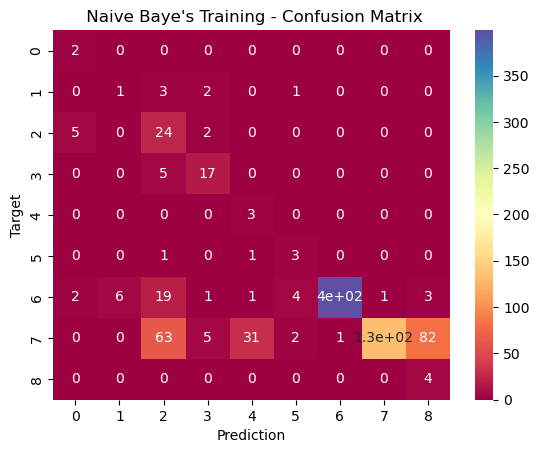

In [218]:
sns.heatmap(nb_train_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title(" Naive Baye's Training - Confusion Matrix")
plt.show()

In [219]:
nb_test_cm = confusion_matrix(ytest, nb_test_pred)
print("Naive Baye's Testing - Confusion Matrix \n", nb_test_cm)

Naive Baye's Testing - Confusion Matrix 
 [[  1   1   0   0   0   0   0   0   0]
 [  0   5   2   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0]
 [  2   8   0   0   2   0 102   2   1]
 [  0  11   4   9   2   0   0  33  20]
 [  0   0   0   0   0   0   0   0   0]]


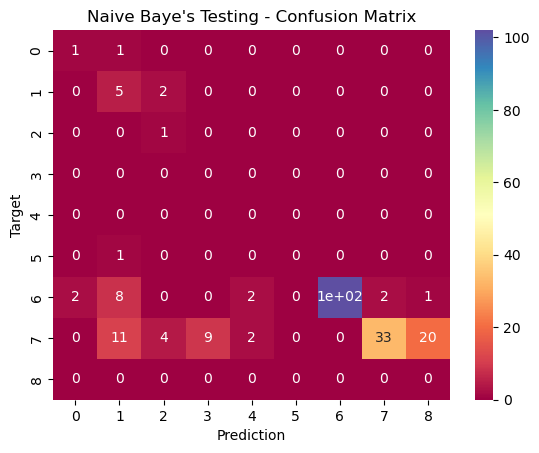

In [220]:
sns.heatmap(nb_test_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title("Naive Baye's Testing - Confusion Matrix")
plt.show()